In [3]:
import torch
from transformers import CLIPModel
from torchvision import datasets, transforms
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [4]:
model =  CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
model = model.cuda()

In [5]:
normalize = transforms.Normalize(mean=(0.48145466, 0.4578275, 0.40821073),
                                         std=(0.26862954, 0.26130258, 0.27577711))  # for CLIP
val_preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        normalize
    ])

In [6]:
##### data
from cifar import Cifar_train, Cifar_test


In [7]:
dataset = Cifar_train(transform=val_preprocess)
dataset_loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=64,
            shuffle=False, num_workers=0, drop_last=True
    )

dataset_test = Cifar_test(transform=val_preprocess)
dataset_loader_test = torch.utils.data.DataLoader(
            dataset_test,
            batch_size=64,
            shuffle=False, num_workers=0, drop_last=True
    )

In [10]:
CLIP_feature = None
for i in dataset_loader:
    a = model.get_image_features(pixel_values = i.cuda()).float()
    a = torch.hstack((a,a))
    if CLIP_feature is None:
        CLIP_feature = a
    else:
        CLIP_feature = torch.vstack((CLIP_feature,a))
    

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 15.74 GiB total capacity; 14.51 GiB already allocated; 25.44 MiB free; 15.10 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [62]:
for i in dataset_loader_test:
    image_features_test = model.get_image_features(pixel_values = i.cuda()).float()
    break

In [63]:
image_features_test

tensor([[ 0.5236, -0.1173, -0.3356,  ...,  0.4854,  0.2284, -0.0049],
        [ 0.5388,  0.2995, -0.1291,  ...,  0.8314,  0.0735,  0.0776],
        [ 0.5322,  0.5193, -0.0377,  ...,  0.4968, -0.3671,  0.4157],
        ...,
        [ 0.2203,  0.3977, -0.3401,  ...,  0.5126, -0.1898,  0.3034],
        [ 0.2498,  0.0956,  0.1781,  ..., -0.0081,  0.0991, -0.0192],
        [ 0.0015,  0.1151, -0.0644,  ...,  0.6470,  0.2389,  0.2501]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [64]:
image_features = image_features.detach().cpu().numpy()
image_features_test = image_features_test.detach().cpu().numpy()

In [65]:
features = np.vstack((image_features,image_features_test))
a = TSNE().fit_transform(features)
b = TSNE().fit_transform(image_features_test)

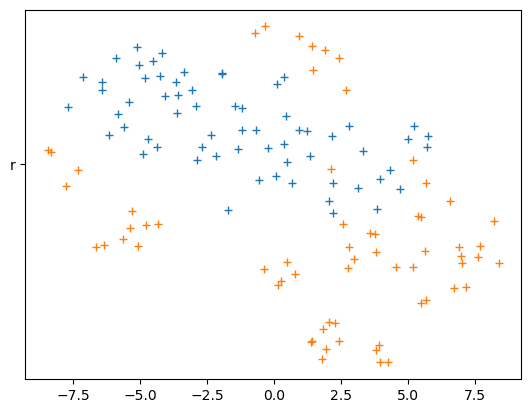

In [66]:
plt.plot(a[:64,0],a[:64,1],'+')
plt.plot(a[64:,0],a[64:,1],'+','r')


In [98]:
import random
from matplotlib import animation
from torchvision import transforms
import ddpm.dataset
from ddpm.helpers import gridify_output, load_parameters